#### Khadija Omran Kidwai

> 
# Project: TMBD Movies Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

 In this project, we will analyze TMBD movies data set from Kaggle, It contains about 10,000 movies informations from (TMBD). TMBD means The Movie Database.
It contains 21 columns:

id                      
imdb_id                 
popularity              
budget                  
revenue                 
original_title          
cast                    
homepage                
director               
tagline                 
keywords                
overview                
runtime                
genres                  
production_companies    
release_date            
vote_count              
vote_average            
release_year            
budget_adj              
revenue_adj  

Note:The final two columns endingwith “_adj” show the budget andrevenue of the associated moviein terms of 2010 dollars,accounting for inflation overtime.
 
The questions we want to ask about this dataset are:


**1-Which movies had got the most high profit ?**

**2-Which movies had got the least profit ?**

**3-In which genres are the most of movies poroduced?**

**4-Which genres are most popular?**

**5-What kinds of properties are associated with movies that have high revenues?**

**6-Which production_companies produced the most ?**
_________________________________________________________________


### First, we will import needed packeges

In [1]:
# Use this cell to set up import statements for all of the packages that you
# plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

>  In this section , we will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

### General Properties

In [2]:
# Load data from csv file to a dataframe named df

df = pd.read_csv('tmdb-movies.csv')
# show 5 first data in dataset
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# check number of rows and column
df.shape

(10866, 21)

In [4]:
#check the data set informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
# view some basic statistical details like percentile, mean,max,min, std etc.
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning 

In this section, we will remove unused columns, duplicates if exists , null values, fix data type if needed. So, these processes are importatnt to make sure that the data set gives a true values when it asked by any qustion. 


#### First, drop unwanted column.

In [6]:

df.drop(['id','imdb_id','cast','homepage','director','tagline','overview','keywords','budget_adj','revenue_adj'],axis=1,inplace=True)

In [7]:
#Check if columns are dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
dtypes: float64(2), int64(5), object(4)
memory usage: 933.9+ KB


#### Second, drop duplicates.

In [8]:
#check how many duplicates are exist
df.duplicated().sum()


1

In [9]:
#remove duplicates
df.drop_duplicates(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 11 columns):
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
dtypes: float64(2), int64(5), object(4)
memory usage: 1018.6+ KB


In [11]:
#check if all duplicates are dropped
df.duplicated().sum().any()

False

#### Third, drop null values.

In [12]:
#check how many null values are exist
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [13]:
#drop null Values
df.dropna(inplace=True)

In [14]:
#check if all null values are dropped
df.isnull().sum().any()

False

#### Fourth, Fix data types.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9826 entries, 0 to 10865
Data columns (total 11 columns):
popularity              9826 non-null float64
budget                  9826 non-null int64
revenue                 9826 non-null int64
original_title          9826 non-null object
runtime                 9826 non-null int64
genres                  9826 non-null object
production_companies    9826 non-null object
release_date            9826 non-null object
vote_count              9826 non-null int64
vote_average            9826 non-null float64
release_year            9826 non-null int64
dtypes: float64(2), int64(5), object(4)
memory usage: 921.2+ KB


As we see, we have to fix release_date from string to datetime.

In [16]:
#Fix datatype of realese_date
df.release_date = pd.to_datetime(df['release_date'])

In [17]:
#check if it changed to datetime
df.dtypes

popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
dtype: object

In [18]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,9826.000000,9.826000e+03,9.826000e+03,9826.000000,9826.000000,9826.000000,9826.000000
mean,0.692013,1.609320e+07,4.398925e+07,102.674944,238.178201,5.967973,2000.903216
std,1.034783,3.214331e+07,1.222949e+08,28.202856,601.548975,0.914518,13.032568
min,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,0.230920,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000
50%,0.417270,1.250000e+05,0.000000e+00,100.000000,45.000000,6.000000,2005.000000
75%,0.773717,1.900000e+07,3.052607e+07,112.000000,172.000000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000


See, also we want to change type of revenue and budget to int, 
but first look at zeros above, so first, we have to drop all zeros then change type.
but we will drop zeros from runtime without change type.

In [19]:
#drop zeros from budget and revenue
#first,replace zero with NAN
df['budget']=df['budget'].replace(0,np.NAN)
df['revenue']=df['revenue'].replace(0,np.NAN )
df['runtime']=df['runtime'].replace(0,np.NAN )

In [20]:
#second, check null values after replacing
df.isnull().sum()

popularity                 0
budget                  4794
revenue                 5073
original_title             0
runtime                   13
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [21]:
# drop null values
df.dropna(inplace=True)
#check if all are dropped
df.isnull().sum().any()

False

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3808 entries, 0 to 10848
Data columns (total 11 columns):
popularity              3808 non-null float64
budget                  3808 non-null float64
revenue                 3808 non-null float64
original_title          3808 non-null object
runtime                 3808 non-null float64
genres                  3808 non-null object
production_companies    3808 non-null object
release_date            3808 non-null datetime64[ns]
vote_count              3808 non-null int64
vote_average            3808 non-null float64
release_year            3808 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(2), object(3)
memory usage: 357.0+ KB


In [23]:
#change type of budget and revenue
df['budget']=df['budget'].astype(np.int64)
df['revenue']=df['revenue'].astype(np.int64)


In [24]:
#check if they changed
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3808 entries, 0 to 10848
Data columns (total 11 columns):
popularity              3808 non-null float64
budget                  3808 non-null int64
revenue                 3808 non-null int64
original_title          3808 non-null object
runtime                 3808 non-null float64
genres                  3808 non-null object
production_companies    3808 non-null object
release_date            3808 non-null datetime64[ns]
vote_count              3808 non-null int64
vote_average            3808 non-null float64
release_year            3808 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(4), object(3)
memory usage: 357.0+ KB


In [25]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,3808.000000,3.808000e+03,3.808000e+03,3808.000000,3808.000000,3808.000000,3808.000000
mean,1.202943,3.758026e+07,1.088904e+08,109.362395,533.749475,6.170142,2001.232668
std,1.480290,4.231668e+07,1.772524e+08,19.855757,883.529734,0.792342,11.326075
min,0.010335,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000
25%,0.470235,1.000000e+07,1.423422e+07,96.000000,74.000000,5.700000,1995.000000
50%,0.808991,2.500000e+07,4.616189e+07,106.000000,208.000000,6.200000,2004.000000
75%,1.386848,5.000000e+07,1.260484e+08,119.000000,584.000000,6.700000,2010.000000
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000


In [26]:
df.loc[df['revenue'] == df['revenue'].max()]

,popularity,budget,revenue,original_title,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
1386,9.432768,237000000,2781505847,Avatar,162.0,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009


<a id='eda'></a>
## Exploratory Data Analysis

>  In this section, After we've cleaned data, we will ready to move on to exploration.
we will ask the data set all the questions that we put int introduction.




### Q1:Which movies had got the most high profit ?

As we know, profit = revenue - budget
so, we will create a new column for the result of profit of every movie.

In [27]:
#insert a profit column
df.insert(3,'profit',df['revenue']-df['budget'])

In [28]:
#check if it inserted
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3808 entries, 0 to 10848
Data columns (total 12 columns):
popularity              3808 non-null float64
budget                  3808 non-null int64
revenue                 3808 non-null int64
profit                  3808 non-null int64
original_title          3808 non-null object
runtime                 3808 non-null float64
genres                  3808 non-null object
production_companies    3808 non-null object
release_date            3808 non-null datetime64[ns]
vote_count              3808 non-null int64
vote_average            3808 non-null float64
release_year            3808 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(5), object(3)
memory usage: 386.8+ KB


In [29]:
#now, we can answer the qustion 
df.loc[df['profit'] == df['profit'].max()]

,popularity,budget,revenue,profit,original_title,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
1386,9.432768,237000000,2781505847,2544505847,Avatar,162.0,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009


As we see, Avatar movie has the highest profit.

### Q2:Which movies had got the least profit ?

we will follow the same process of previous question but insted of max, we will use min

In [30]:
df.loc[df['profit'] == df['profit'].min()]

,popularity,budget,revenue,profit,original_title,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
2244,0.25054,425000000,11087569,-413912431,The Warrior's Way,100.0,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,2010-12-02,74,6.4,2010


 The Warrior's Way movie has the least profit.

### Q3:In which genres are the most of movies poroduced?

In genres column, every movie has many type of genres seprated by | ,
so, we will split genres from each other and count which genres are most produced.

In [31]:
#separate the string in column genres  by '|' 
genres_ = df['genres'].str.cat(sep = '|')
#store the values separately in panda series
genres_ = pd.Series(genres_.split('|'))
#count the number of each genres
gen_count = genres_.value_counts().tolist()
# store the name of genres type 
gen_type = genres_.unique().tolist()
# make a new dataframe using data of count and type
data={'type':gen_type,'count':gen_count}
genres_df=pd.DataFrame(data)
# check the dataframe
genres_df

,type,count
0,Action,1731
1,Adventure,1336
2,Science Fiction,1195
3,Thriller,1076
4,Fantasy,743
5,Crime,659
6,Western,649
7,Drama,517
8,Family,459
9,Animation,417


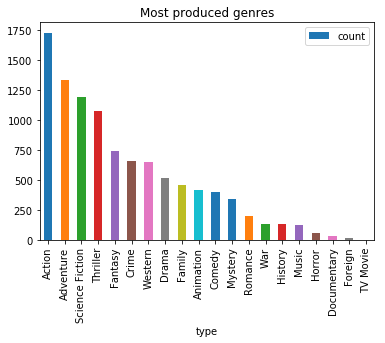

In [32]:
# Visualize the result of the question
genres_df.plot(x="type", y="count", kind="bar",title="Most produced genres");


As we see, Action movies are most produced than the othe genres.and next is adventure,then scince fiction, then the others.

### Q4:Which genres are most popular?

We want to find the most popular genres

In [33]:
# using group by to relate the poplularity with genres type
f=df.groupby(genres_df.type).popularity.mean().tolist()
#inser popularity column in genres_df
genres_df.insert(2,'popularity',f)
genres_df.head()

,type,count,popularity
0,Action,1731,32.985763
1,Adventure,1336,28.419936
2,Science Fiction,1195,6.326804
3,Thriller,1076,6.200282
4,Fantasy,743,9.110700


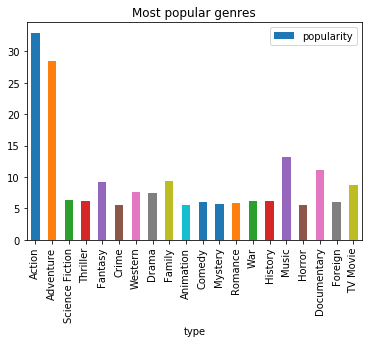

In [34]:
#plot to see the ressult
genres_df.plot(x="type", y="popularity", kind="bar",title="Most popular genres");


As we see, Action is the most popular genres.

###  Q5:What kinds of properties are associated with movies that have high revenues?

After many experment, we find two properties that affect high revenue
first, vote averge
second, realesde year

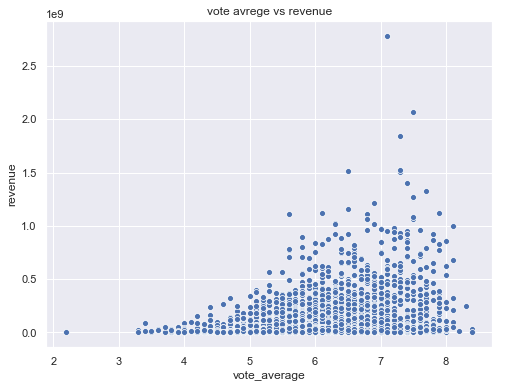

In [35]:
#make a scatter plot for vote_average and revenue using seaborn
sns.set(style="whitegrid");
sns.set(font_scale=1);
plt.subplots(figsize=(8, 6));
ax = sns.scatterplot(x='vote_average', y='revenue', data=df);

plt.title('vote avrege vs revenue');

As we see, the histogram skweed to lef which mean that if vote_avrege number is larger then revenue is also become larger and vice versa.

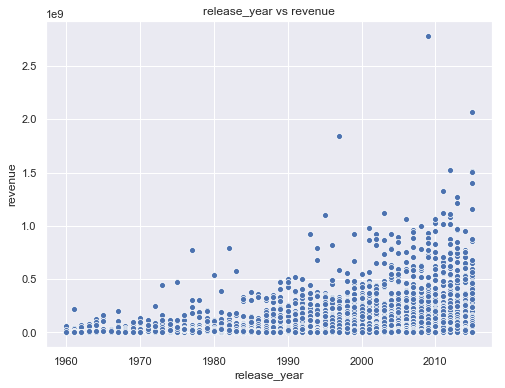

In [36]:
##make a scatter plot for release_year and revenue using seaborn
sns.set(style="whitegrid");
sns.set(font_scale=1);
plt.subplots(figsize=(8, 6));
ax = sns.scatterplot(x='release_year', y='revenue', data=df);

plt.title('release_year vs revenue');

the histogram is skweed to lef which mean that in the recent years the revenue become larger more than the past.

### Q6:Which production_companies produced the most ?

In this qustion, we will use the same process in question 3

In [37]:
#separate the string in column production_companies  by '|' 
companies_ = df['production_companies'].str.cat(sep = '|')
#store the values separately in panda series
companies_ = pd.Series(companies_.split('|'))
#count the number of each company
comp_count = companies_.value_counts().tolist()
# store the name of company
comp_name = companies_.unique().tolist()
# make a new dataframe using data of count and name
comp_data={'name':comp_name,'count':comp_count}
comp_df=pd.DataFrame(comp_data)
#  largest 10 counts company
comp_df=comp_df.nlargest(10, 'count')


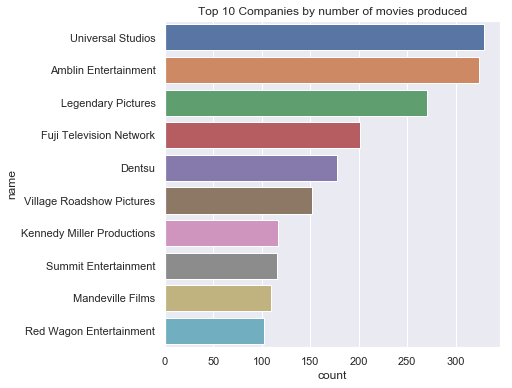

In [38]:
#Plot the top 10 production company
sns.set(style="whitegrid");
sns.set(font_scale=1);
f, ax = plt.subplots(figsize=(6, 6));
ax = sns.barplot(x='count', y='name', data=comp_df);

plt.title('Top 10 Companies by number of movies produced');

<a id='conclusions'></a>
## Conclusions

 Finally, we've check up the dataset, clean it from zeros, duplicates, null values, unused column , fix the data type, then ask many questions and get results.
The result we've got are:

1- Avatar movie has the highest profit.

2- The Warrior's Way movie has the least profit.

3- Action movies are most produced and next is adventure,then scince fiction, then the others.

4- The most popular genres is Action then Adventure.

5- vote_avrege is affect revenue positively so,if number of vote_averge become larger then revenue is also become larger and vice versa.

6- In recent years, the revenue become larger more than the past.

7- By order, Universal Studios,Amblin Entertainment and Legendary Pictures have produced a big numbers of movies.		

The limitations we faced are: none.



## Resoureces
https://mode.com/python-tutorial/python-histograms-boxplots-and-distributions/#comparing-distributions-with-histograms

https://www.dummies.com/education/math/statistics/how-the-shape-of-a-histogram-reflects-the-statistical-mean-and-median/

https://gist.github.com/claudiodsf/6596204

https://github.com/abbasalali/Investigate-a-Dataset-TMDB-Movies/blob/master/Investigate_a_Dataset.ipynb